In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Referencias Principales

*   Lorenzo Vangelista, Frequency Shift Chirp Modulation: The LoRa Modulation
*   Video resumen del paper de Lorenzo: How LoRa Modulation really works
 *   https://www.youtube.com/watch?v=jHWepP1ZWTk&t=856s

*   LoRa Modulation
 *   https://en.wikipedia.org/wiki/LoRa

# **Modulación LoRa**
  La modulación LoRa es una de las redes de área amplia y bajo consumo (LPWAN por sus siglas en inglés), muy utilizadas en el campo de Internet de las cosas (IOT). Las ventajas y desventajas de esta modulación serán mencionadas y analizadas a lo largo de este colab.

## Parámetros de la modulación:

**SF - Spreading factor:**
Representa cuanto se "esparce" la señal en el tiempo. Es un entero real que usualmente toma valores en $\{7,8,9,10,11,12\}$

**Ts - Symbol time:**
Tiempo que tarda en enviarse un símbolo. Se calcula como $2^{SF} T$


**Bw - BandWidth:**
Ancho de banda definido para la transmisión

**T - Tiempo de muestra:**
Delta de tiempo en el cual se toma una muestra (T=1/B)

**s - Sent symbol:**
Símbolo que se quiere enviar, puede tomar valores en $\{0,...,2^{SF}-1\}$

## WaveForm:
La forma de onda transmitida de duración $T_s$ para cada $s(nT_s)$ es la siguiente:
$$c(nT_s+kT) = \frac{1}{\sqrt{2^{SF}}} e^{j2\pi \left[ (s(nT_s)+k)_{mod}2^{SF}\right]kT\frac{B}{2^{SF}}}$$

$$c(nT_s+kT) = \frac{1}{\sqrt{2^{SF}}} e^{j2\pi \left[ (s(nT_s)+k)_{mod}2^{SF}\right]\frac{k}{2^{SF}}}$$

$\text{para } k=0,1,...,2^{SF}-1$

Se puede observar que a medida que la frecuencia aumenta linealmente con $k$, que es el índice de tiempo, podemos notar que cada waveform difiere de una waveform base con frecuencia inicial 0 con un cambio de frecuencia (frecuency shift) $s(nT_s)$.

El $\Delta f$ de la forma de onda está dado por $\frac{BW}{2^{SF}}$


El siguiente código pretende mostrar la modulación LoRa para el envío de un símbolo específico

In [ ]:
#Función definida para generar la forma de onda con modulación LoRa
def LoRa_modulation(SF, BW, s,delta,c=1):
  Ts=2**SF
  T=1/BW
  num_samples=int(2**SF*1/delta)

  lora_symbols=[]
  lora_symbols_f=[]
  k=s
  fMax=(2**SF-1)*BW/(2**SF)

  for n in range(num_samples):
    f=k*BW/(2**SF)
    t=k*T
    if(f>fMax):
      k=k-Ts
      f=k*BW/(2**SF)
    sample=(1/(np.sqrt(2**SF)))*np.exp(c*1j*2*np.pi*f*t*1/2)
    lora_symbols.append(sample)
    lora_symbols_f.append(f)
    k=k+delta
  return  lora_symbols, lora_symbols_f, num_samples,fMax

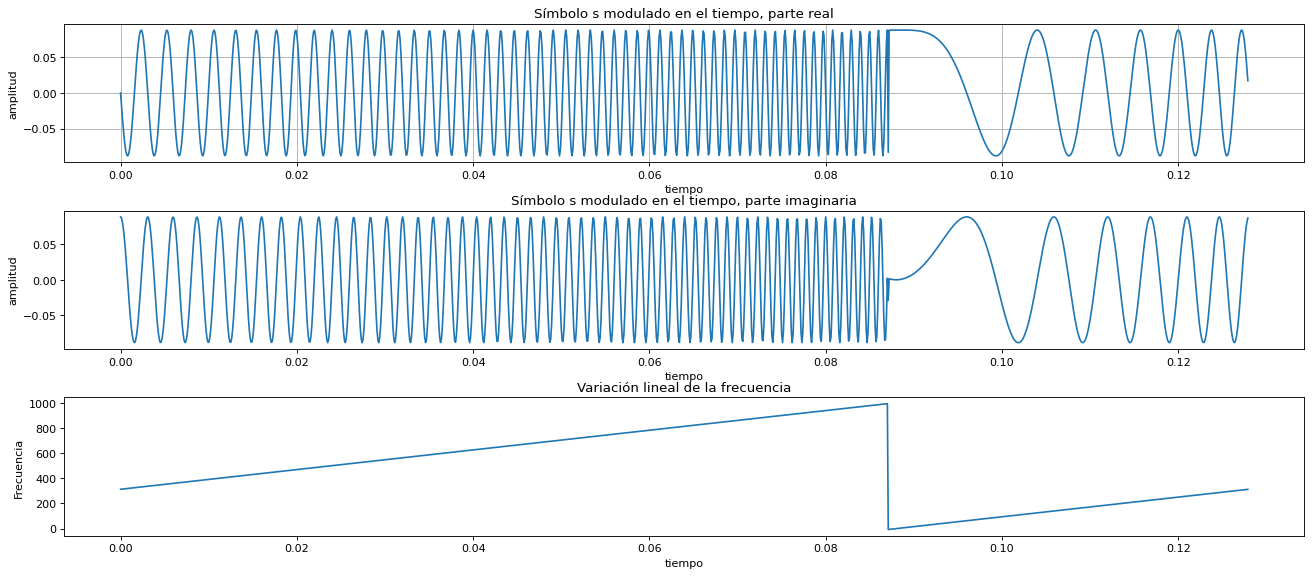

Símbolo enviado:  40
Valor de frecuencia inicial:  312.5
Valor del Delta frecuencia:  7.8125
Relación entre la frecuencia inicial y el Delta frecuencia:  312.5 / 7.8125  =  40.0
Valor de frecuencia máximo teórico:  (2^SF-1)*BW/(2^SF)=  992.1875
Valor de frecuencia máxima alcanzado: 992.1874999999746



In [ ]:
SF=7
BW= 1000
s=40
delta = 0.1
Deltaf=(BW/(2**SF))
lora_symbols, lora_symbols_f, num_samples,fMax = LoRa_modulation(SF,BW,s,delta)

#Graficas de la modulación
t=np.arange(0,num_samples/BW*delta,delta/BW)
plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(3,1,1)
plt.plot(t,np.real(lora_symbols))
plt.title('Símbolo s modulado en el tiempo, parte real')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.grid()
plt.subplot(3,1,2)
plt.plot(t,np.imag(lora_symbols))
plt.title('Símbolo s modulado en el tiempo, parte imaginaria')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(3,1,3)
plt.plot(t,lora_symbols_f)
plt.title('Variación lineal de la frecuencia')
plt.xlabel('tiempo')
plt.ylabel('Frecuencia')

plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
plt.show()

print("Símbolo enviado: ",s)
print("Valor de frecuencia inicial: ",lora_symbols_f[0])
print("Valor del Delta frecuencia: " ,Deltaf)
print("Relación entre la frecuencia inicial y el Delta frecuencia: ",lora_symbols_f[0],"/",Deltaf," = ",(lora_symbols_f[0]/Deltaf))
print("Valor de frecuencia máximo teórico:  (2^SF-1)*BW/(2^SF)= ",fMax)
print("Valor de frecuencia máxima alcanzado:", np.max(lora_symbols_f))
print("")

En estos gráficos puede observarse claramente como la frecuencia de la ondas se incrementa linealmente desde un valor $f=s*\frac{BW}{2^{SF}}$. Una vez que llega a su valor máximo dado por $(2^{SF}-1)*\frac{BW}{2^{SF}}$ la frecuencia cae a 0 y vuelve a crecer hasta llegar a la frecuencia inicial. Todo esto tiene una duración $T_s$.


###Validación de la ortogonalidad y normalidad de las Waveforms
Para la validación de la ortogonalidad entre waveforms correspondientes a diferentes símbolos se debe probar que
$$\langle C(nT_s+kT)_{s(nT_s)=i},C(nT_s+kT)_{s(nT_s)=q}\rangle = 0 \hspace{5mm} \forall i,q \hspace{2mm} | \hspace{2mm} i\neq q$$

Para validar la normalidad se debe probar que
$$\langle C(nT_s+kT)_{s(nT_s)=i},C(nT_s+kT)_{s(nT_s)=q}\rangle = 1 \hspace{5mm} \forall i,q \hspace{2mm} | \hspace{2mm} i = q$$

Lo mismo se puede verificar de forma práctica con el siguiente código

In [ ]:
SF_o=7
BW_o= 1000
s_1=0
s_2=0
delta_o = 0.1

waveform_1,*b= LoRa_modulation(SF_o,BW_o,s_1,delta_o)
waveform_2,*b= LoRa_modulation(SF_o,BW_o,s_2,delta_o,-1)
pi=np.dot(waveform_1,waveform_2) * delta_o

print("Producto punto entre las dos waveforms: ")
print(np.round(np.real(pi),1))

Producto punto entre las dos waveforms: 
1.0


# **Demodulación óptima**

  Para demodular la señal, lo que se puede realizar es la comparación con cada una de las bases posibles. Este método no es el más eficiente, porque corelaciona la señal recibida contra las $2^{SF}$ hipótesis.
  Cuando se aumenta el valor de $SF$ se puede notar que el tiempo de ejecución del código crece exponencialmente, haciendoló muy ineficiente para implementar un receptor con esta técnica.

Según el criterio ML, el símbolo que maximiza la probabilidad de acertar es:  25


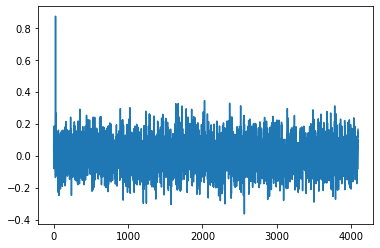

In [ ]:
SF_d=12
BW_d= 1000
s_d=25
delta_d=1

waveform_s,*b_d= LoRa_modulation(SF_d,BW_d,s_d,delta_d)

corr=[]
noise_d=np.random.normal(0,0.14,size=len(waveform_s))
waveform_r=waveform_s+noise_d
max=0
index=0
for i in range(2**SF_d-1):
  waveform_temp,waveform_temp_f,num_samples_d,FMax_d= LoRa_modulation(SF_d,BW_d,i,delta_d,-1)
  corr_temp=np.dot(waveform_r,waveform_temp)*delta_d
  corr.append(corr_temp)
  if(corr_temp>max):
    max=corr_temp
    index=i

print("Según el criterio ML, el símbolo que maximiza la probabilidad de acertar es: ", index)
plt.plot(np.real(corr))
plt.show()

# **Demodulación con truco matemático**


Una vez que se recibe la señal enviada es necesario demodularla para decodificar el símbolo transmitido, para realizar esto en principio podríamos utilizar un correlador:
  
La forma de realizar esta correlación sería, repetir la siguiente proyección de la señal recibida con cada cada símbolo base y elegir el que mayor correlación tenga.

$$\sum_{k=0}^{2^{SF}-1} r(nT_s+kT).c^*(nT_s+kT)\hspace{4mm}(1)$$

 lo cual sería altamente ineficiente por la cantidad de operaciones que se deben realizar y tendría muchos problemas de sincronización.

 El paper de Lorenzo Vangelista habla sobre un "truco" matemático que nos permite realizar la demodulación de una forma mucho más eficiente y fácil.

Para comprender este proceso, analicemos la función de los símbolos base $c^*$

$$c^*(nT_s+kT)= \frac{1}{\sqrt{2^{SF}}} e^{-j2\pi (s(nT_s)+k \text{ mod }2^{SF})\frac{k}{2^{SF}}} \hspace{4mm}(2)$$

En el exponente, agregamos $k-k$ lo cual no afecta la ecuación y nos permite separar la expresión en dos exponenciales

$$c^*(nT_s+kT)= \frac{1}{\sqrt{2^{SF}}}\left(e^{-j2\pi \frac{k^2}{2^{SF}}} \right)\left( e^{-j2\pi (s(nT_s)+k \text{ mod }2^{SF}-k)\frac{k}{2^{SF}}}\right)$$

reduciendo la expresión del último paréntesis

$$c^*(nT_s+kT)= \frac{1}{\sqrt{2^{SF}}}\left(e^{-j2\pi \frac{k^2}{2^{SF}}} \right)\left( e^{-j2\pi (s(nT_s) \text{ mod }2^{SF})\frac{k}{2^{SF}}}\right) \hspace{4mm}(3)$$

A partir de $(3)$ podemos observar dos cosas.
* Inicialmente, el primer paréntesis corresponde a una forma de onda de
modulación lora conjugada y con $s=0$, a esta señal se la conoce como *base down chirp* y su gráfica de frecuencia vs tiempo puede observarse en la salida del script de python a continuación.
* Por otro lado, el segundo paréntesis corresponde a una onda pura de frecuencia $f=s$

Si volvemos a revisar la expresión $(1)$ pero con estas observaciones sobre $c^*$ podemos ver que si a la señal recibida la proyectamos sobre la señal ***base down chirp*** (proceso conocido como dechirping) obtendremos una onda pura de frecuencia $f=s$ y por lo tanto para encontrar el símbolo enviado, basta con encontrar la componente de frecuencia de esta señal, lo cual podemos hacer fácilmente con la transformada rápida de Fourier (fft)

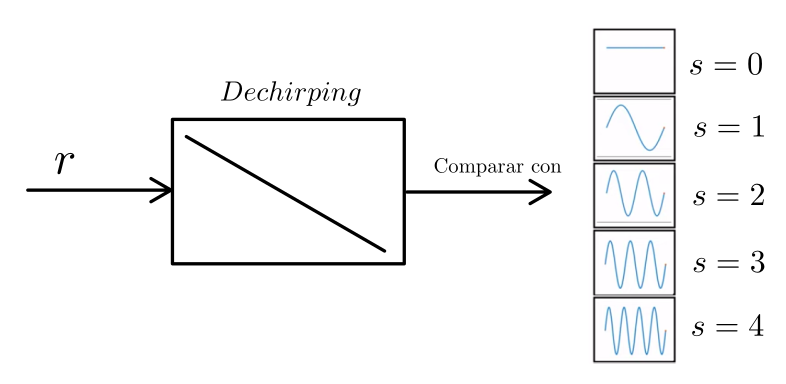

In [ ]:
#Función definida para generar la base down chirp
def BaseDownChirp(SF,BW,delta):
  base_down_chirp=[]
  base_down_chirp_f=[]
  k=0
  for n in range(int(2**SF*1/delta)):
    f=k*BW/(2**SF)
    t=k*1/BW
    if(f>fMax):
      k=k-2**SF
      f=k*BW/(2**SF)
    sample=(1/(np.sqrt(2**SF)))*np.exp(-1j*2*np.pi*f*t*1/2)
    base_down_chirp.insert(0,sample)
    base_down_chirp_f.insert(0,f)
    k=k+delta
  return base_down_chirp,base_down_chirp_f

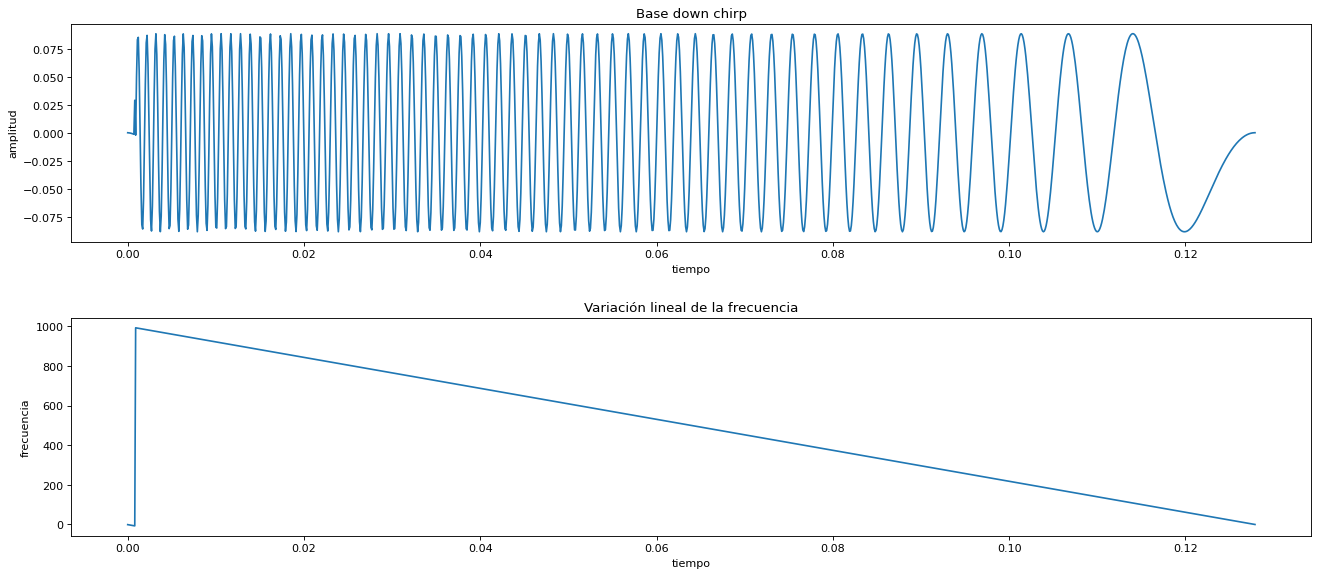

In [ ]:
base_down_chirp,base_down_chirp_f= BaseDownChirp(SF,BW,delta)

t=np.arange(0,num_samples*delta/BW,delta/BW)
plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(t,np.imag(base_down_chirp))
plt.title('Base down chirp')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(2,1,2)
plt.plot(t,base_down_chirp_f)
plt.title('Variación lineal de la frecuencia')
plt.xlabel('tiempo')
plt.ylabel('frecuencia')
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
plt.show()

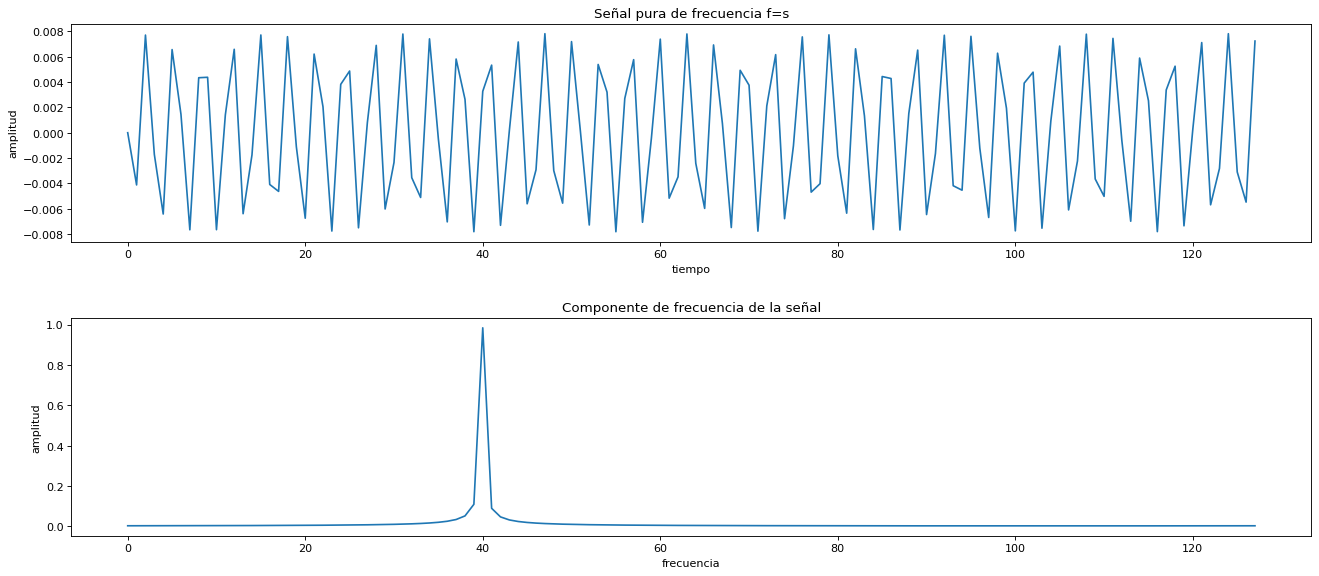

In [ ]:
lora_symbols_n=[]
base_down_chirp_n=[]
for i in range(len(lora_symbols)):
  if(i%(1/delta)==0):
    lora_symbols_n.append(lora_symbols[i])
    base_down_chirp_n.append(base_down_chirp[i])

dechirping=[]
for i in range(len(lora_symbols_n)):
  dechirping.append(lora_symbols_n[i]*base_down_chirp_n[i])

t=np.arange(0,num_samples*delta,1)
plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(t,np.real(dechirping))
plt.title('Señal pura de frecuencia f=s')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(2,1,2)
plt.plot(t,abs(np.fft.fft(dechirping)))
plt.title('Componente de frecuencia de la señal')
plt.xlabel('frecuencia')
plt.ylabel('amplitud')
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
plt.show()

# **Envío y recepción interactivo con LoRa**
Al ejecutar esta celda, se deberá ingresar el símbolo que desea enviar. Seguido de eso deberá ingresar la disperción del ruido que introduce el canal. Obtendrá como resultado una serie de gráficos con la modulación y demodulación y una estimación del dato enviado, esperamos sea correcta 😃

Ingrese el mensaje que desea transmitir (0 a 127): 
14
Ingrese la SNR deseada en [dB]: 
-30
Desviación estandar del ruido:  0.46688610162071764


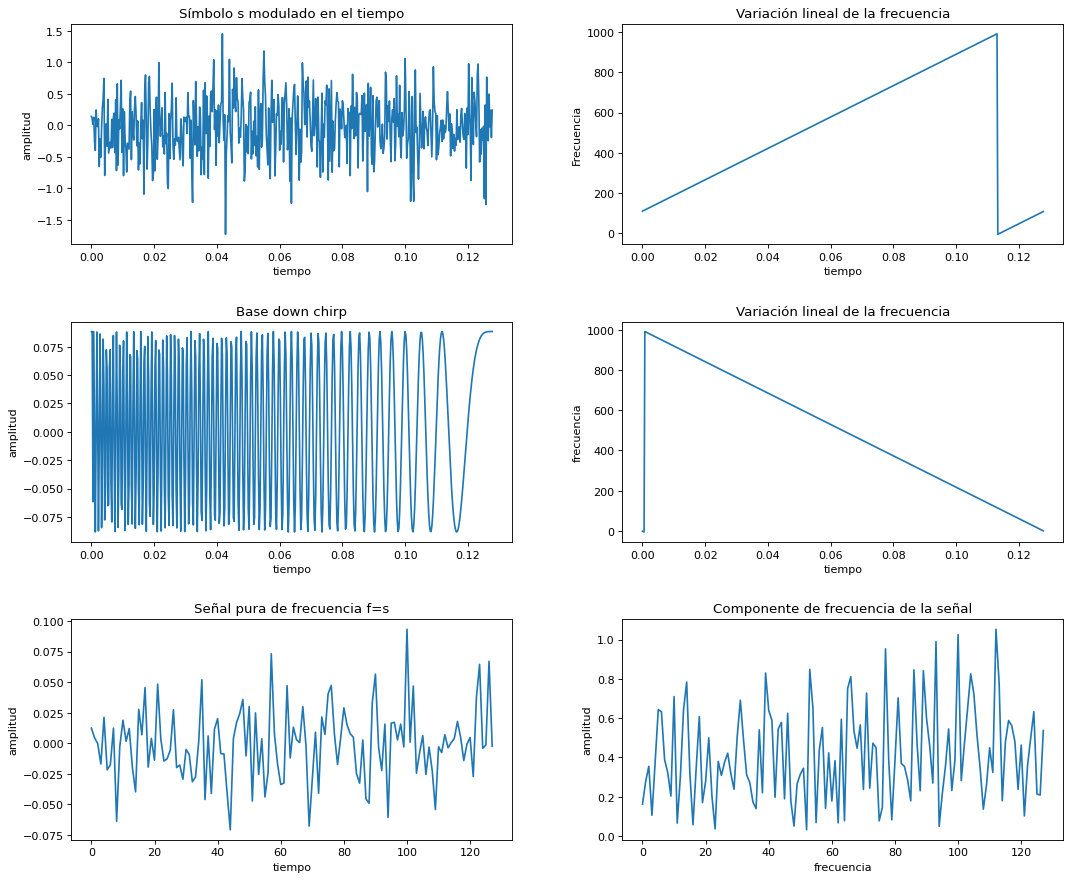

Usted envió un:  112


In [ ]:
SF_i=7
BW_i=1000
delta_i=0.25
print("Ingrese el mensaje que desea transmitir (0 a 127): ")
s_i=int(input())
print("Ingrese la SNR deseada en [dB]: ")
snr_i=float(input())


lora_symbols_i,lora_symbols_f_i,num_samples_i,FMax_i= LoRa_modulation(SF_i,BW_i,s_i,delta_i)


lora_symbols_w=np.array(lora_symbols_i)**2
lora_symbols_avg=np.mean(lora_symbols_w)
lora_symbols_avg_db=10*np.log10(lora_symbols_avg)
noise_avg_db=lora_symbols_avg_db-snr_i
noise_avg_w=10**(noise_avg_db/10)
noise_i=np.random.normal(0,np.sqrt(np.real(noise_avg_w)),size=len(lora_symbols_i))
lora_symbols_i=lora_symbols_i+noise_i

print("Desviación estandar del ruido: ", np.sqrt(np.real(noise_avg_w)))

base_down_chirp_i, base_down_chirp_f_i = BaseDownChirp(SF_i,BW_i,delta_i)


dechirping_i=[]
for i in range(len(lora_symbols_i)):
  if(i%4==0):
    dechirping_i.append(lora_symbols_i[i]*base_down_chirp_i[i])

frecuency_received=abs(np.fft.fft(dechirping_i))

max=0
symbol_received=0
for i in range(len(frecuency_received)):
  if(frecuency_received[i]>max):
    max=frecuency_received[i]
    symbol_received=i

t=np.arange(0,num_samples_i/4/BW_i,0.25/BW_i)
plt.figure(figsize=(16,6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(3,2,1)
plt.plot(t,np.real(lora_symbols_i))
plt.title('Símbolo s modulado en el tiempo')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(3,2,2)
plt.plot(t,lora_symbols_f_i)
plt.title('Variación lineal de la frecuencia')
plt.xlabel('tiempo')
plt.ylabel('Frecuencia')

plt.subplot(3,2,3)
plt.plot(t,np.real(base_down_chirp_i))
plt.title('Base down chirp')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(3,2,4)
plt.plot(t,base_down_chirp_f_i)
plt.title('Variación lineal de la frecuencia')
plt.xlabel('tiempo')
plt.ylabel('frecuencia')
t=np.arange(0,num_samples_i/4,1)
plt.subplot(3,2,5)
plt.plot(t,np.real(dechirping_i))
plt.title('Señal pura de frecuencia f=s')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.subplot(3,2,6)
plt.plot(t,frecuency_received)
plt.title('Componente de frecuencia de la señal')
plt.xlabel('frecuencia')
plt.ylabel('amplitud')

plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=1.8,wspace=0.25,hspace=0.35)
plt.show()

print("Usted envió un: ",symbol_received)

# **Conclusiones sobre LoRa**:
Hemos realizado simulaciones y llegamos a las siguientes concluciones a cerca de las ventajas y desventajas de la modulacion LoRa:
## Ventajas:
*   Inmunidad al ruido. La forma de modulacion hace que la proyeccion del ruido sobre las bases sea muy baja.
*   Bajo consumo. La inmunidad al ruido nos permite trabajar con baja potencia.
*   Como la cantidad de bits enviados corresponde a SF, se pueden enviar muchos bits en paralelo, por lo tanto podríamos comunicarnos con diferentes dispositivos al mismo tiempo.

## Desventajas:
*   LoRa es una modulación de espectro expandido. Su gran ancho de banda es su principal desventaja.


##Inmunidad al ruido con el aumento de SF
Se puede observar con claridad que al aumentar el valor de SF, la señal se vuelve más inmune al ruido. Esto sucede debido a que el tiempo de símbolo $T_s$, que está relacionado con $SF$ de la forma $T_s=2^{SF}T$, aumenta su valor y por consecuencia, la energía de la señal transmitida aumenta. Es decir, mientras más tiempo tenga la señal correspondiente al símbolo enviado, más energía tendrá y por lo tanto se la puede discriminar mejor del ruido del canal.

En el siguiente código se puede variar el valor de SF para un mísmo símbolo y analizar los gráficos para comprobar la afirmación realizada.

In [ ]:
def calculateNoiseProyection(SF):
  BW=1000
  s=50
  snr=-30
  delta=0.25
  lora_symbols,lora_symbols_f,*b = LoRa_modulation(SF,BW,s,delta)
  num_samples=b[0]
  lora_symbols_w=np.array(lora_symbols)**2
  lora_symbols_avg=np.mean(lora_symbols_w)
  lora_symbols_avg_db=10*np.log10(lora_symbols_avg)
  noise_avg_db=lora_symbols_avg_db-snr
  noise_avg_w=10**(noise_avg_db/10)
  noise=np.random.normal(0,np.sqrt(np.real(noise_avg_w)),size=len(lora_symbols))
  lora_symbols=lora_symbols+noise

  base_down_chirp,base_down_chirp_f=BaseDownChirp(SF,BW,delta)

  dechirping=[]
  for i in range(len(lora_symbols)):
    if(i%4==0):
      dechirping.append(lora_symbols[i]*base_down_chirp[i])

  frecuency_received=abs(np.fft.fft(dechirping))

  max=0
  symbol_received=0
  for i in range(len(frecuency_received)):
    if(frecuency_received[i]>max):
      max=frecuency_received[i]
      symbol_received=i


  return num_samples, frecuency_received,symbol_received

Simbolo enviado:    s = 50


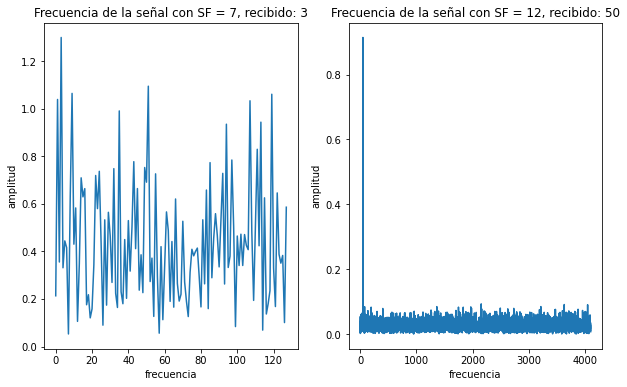

In [ ]:
num_samples_1, frecuency_received_1, symbol_received_1 = calculateNoiseProyection(7)
num_samples_2, frecuency_received_2, symbol_received_2 = calculateNoiseProyection(12)

print("Simbolo enviado:    s = 50")

plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
t=np.arange(0,num_samples_1/4,1)
plt.subplot(1,2,1)
plt.plot(t,frecuency_received_1)
plt.title('Frecuencia de la señal con SF = 7, recibido: '+str(symbol_received_1))
plt.xlabel('frecuencia')
plt.ylabel('amplitud')

t=np.arange(0,num_samples_2/4,1)
plt.subplot(1,2,2)
plt.plot(t,frecuency_received_2)
plt.title('Frecuencia de la señal con SF = 12, recibido: '+str(symbol_received_2))
plt.xlabel('frecuencia')
plt.ylabel('amplitud')

plt.show()

##Ventaja de la demodulación con "truco" matemático
El uso de la demodulación óptima es muy poco eficiente, ya que la complejidad computacional aumenta exponencialmente con el crecimiento del Spreading Factor, ya que se requieren $2^{SF}$ comparaciones para determinar la que maximiza la probabilidad de acertar. En el bloque de código "Demodulación óptima" se puede cambiar el valor de SF a un número mayor (por ejemplo 13) y ver que se tarda un tiempo considerable en resolver todas estas operaciones.
Por otro lado, si en la demodlación con "truco" matemático se aumenta el valor del SF no se notan diferencias en el tiempo de cálculo ya que sólo se realiza una proyección sobre una base particular.